In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The Teacher's Defense ##

In [2]:
scores = Table.read_table('data/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = 13.6667 

In [6]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
8,25
12,21
8,8
9,14
7,12
3,22
3,10
8,7
8,24
6,11


In [7]:
np.average(random_sample.column('Midterm'))

17.037037037037038

In [8]:
# Write a function to simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [9]:
# Use a for loop to simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

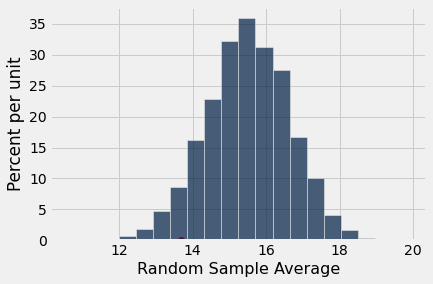

In [10]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [11]:
# Calculate how many simulated statistics were more extreme
# than the observed statistic, as a percentage of the total
# We call this the p-value

sum(sample_averages <= observed_average) / 50000
#here is the p value
#p value is greater than the significance level of 5%
# we would fail to reject the null hypothesis

0.05828

In [12]:
# How low did the average score need to be to reject the null?
# Well, 5% of 50,000 = 2500. Let's sort the simulated averages
# and look at the 2500th item in the array. That's the score 
# right at the decision point

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point
#this is a different approach (critical value)
#13.59 is our critical value.  Test score averages below this value are in the rejection region and are 
#not likely to occur
#our observed value is 13.6667 which is slightly above this critical value
#we would fail to reject the null because our observed value is not in the rejection region

13.592592592592593

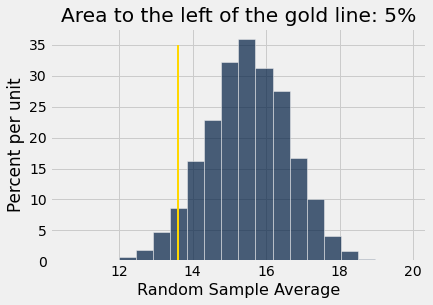

In [13]:
# This code will visualize the 5% mark on the distribution
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');